In [238]:
import pandas as pd
import os
import pickle
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

# 1. Data Preprocessing

In [188]:
path  = "../csv_files_new_ppi/"
data_huri = pd.read_csv(path+"Huri_ppi_with_sequences.csv")
data_huri.head()

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,ENSG00000000005,ENSG00000061656,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MRRSSRPGSASSSRKHTPNFFSENSSMSITSEDSKGLRSAEPGPGE...
1,ENSG00000000005,ENSG00000099968,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MASSSTVPLGFHYETKYVVLSYLGLLSQEKLQEQHLSSPQGVQLDI...
2,ENSG00000000005,ENSG00000104765,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MSSHLVEPPPPLHNNNNNCEENEQSLPPPAGLNSSWVELPMNSSNG...
3,ENSG00000000005,ENSG00000105383,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHP...
4,ENSG00000000005,ENSG00000114455,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MKAQTALSFFLILITSLSGSQGIFPLAFFIYVPMNEQIVIGRLDED...


In [189]:
print("Maximum length of Proteins sequences: ", len(max(set(data_huri['Protein_A_sequence']).union(set(data_huri['Protein_B_sequence'])),key=len)))


print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_huri['Protein_A_sequence']).union(set(data_huri['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1024


Minimum length of Proteins sequences:  25


In [190]:
data_deep_viral = pd.read_csv(path+"deep_viral_human_virus.csv")
data_deep_viral = data_deep_viral.rename(columns ={"Human Protein":"Protein A","Virus Protein":"Protein B","HS":"Protein_A_sequence","VS":"Protein_B_sequence"})
data_deep_viral.head()

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,O95251,Q2Q067,MPRRKRNAGSSSDGTEDSDFSTDLEHTDSSESDGTSRRSARVTRSS...,MAASGLFRCLPVSCPEDLLVEELVDGLLSLEEELKDKEEEKAVLDG...
1,Q16537,P05919,MSSAPTTPPSVDKVDGFSRKSVRKARQKRSQSSSQFRSQGKPIELT...,QPIPIVAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRLI...
2,P11166,O56232,MEPSSKKLTGRLMLAVGGAVLGSLQFGYNTGVINAPQKVIEEFYNQ...,MASVVGWGPHSLHACPALVLSNDVTIDAWCPLCGPHERLQFERIDT...
3,P07355,P04591,MSTVHEILCKLSLEGDHSTPPSAYGSVKAYTNFDAERDALNIETAI...,MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...
4,O96017,P14079,MSRESDVEAQQSHGSSACSQPHGSVTQSQGSSSQSQGISSSSTSTM...,MAHFPGFGQSLLFGYPVYVFGDCVQGDWCPISGGLCSARLHRHALL...


In [191]:
print("Maximum length of Proteins sequences: ", len(max(set(data_deep_viral['Protein_A_sequence']).union(set(data_deep_viral['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_deep_viral['Protein_A_sequence']).union(set(data_deep_viral['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1000


Minimum length of Proteins sequences:  14


In [192]:
data_denovo = pd.read_csv(path+"Denovo_ppi_with_sequences.csv")
data_denovo.head()

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,P03070,O00629,MDKVLNREESLQLMDLLGLERSAWGNIPLMRKAYLKKCKEFHPDKG...,MADNEKLDNQRLKNFKNKGRDLETMRRQRNEVVVELRKNKRDEHLL...
1,P06465,O00716,MVGEMPALKDLVLQLEPSVLDLDLYCYEEVPPDDIEEELVSPQQPY...,MRKGIQPALEQYLVTAGGGEGAAVVAAAAAASMDKRALLASPGFAA...
2,P07910,A6H4P0,MASNVTNKTDPRSMNSRVFIGNLNTLVVKKSDVEAIFSKYGKIVGC...,EMADKALFAAARFPECPEGSSISAPSQTSVDVSLIQDIERILDYSL...
3,P63165,F5HCV3,MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKK...,MAQDDKGKKLRRSCVESFVGLSDELKAQLYQCVLLINDAYETIYDP...
4,P63165,P03209,MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKK...,MRPKKDGLEDFLRLTPEIKKQLGSLVSDYCNVLNKEFTAGSVEITL...


In [193]:
print("Maximum length of Proteins sequences: ", len(max(set(data_denovo['Protein_A_sequence']).union(set(data_denovo['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_denovo['Protein_A_sequence']).union(set(data_denovo['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1024


Minimum length of Proteins sequences:  44


In [194]:
data_lstm_phv = pd.read_csv(path+"lstm_phv_ppi_with_sequences.csv")
data_lstm_phv = data_lstm_phv.rename(columns ={"human_pro":"Protein A","virus_pro":"Protein B","human_seq":"Protein_A_sequence","virus_seq":"Protein_B_sequence"})
data_lstm_phv.head()

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,P19838,Q6VGT6,MAEDDPYLGRPEQMFHLDPSLTHTIFNPEVFQPQMALPTDGPYLQI...,MTDTLDLEMDGIITEQRLLERRRAAAEQQRMNQELQDMVNLHQCKR...
1,P10275,Q69027,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,MAARLCCQLDPARDVLCLRPVGAESRGRPVSGPFGPLPSPSSSAVP...
2,Q13616,Q6TVW2,MSSTRSQNPHGLKQIGLDQIWDDLRAGIQQVYTRQSMAKSRYMELY...,MSEKGFPTFVNAAAMLSRESVVAPHADLLFRYLESGQVDLATVRAL...
3,Q13616,Q6TVJ1,MSSTRSQNPHGLKQIGLDQIWDDLRAGIQQVYTRQSMAKSRYMELY...,MDAAEMEELDINAESVLYDYFILNADRARVGEVVMLLAQGAEINYA...
4,Q13616,Q6TVJ2,MSSTRSQNPHGLKQIGLDQIWDDLRAGIQQVYTRQSMAKSRYMELY...,MDFLGAALYDYVADAENVRVDEVRRLLAAGASVEYAGEFGKTALHQ...


In [195]:
print("Maximum length of Proteins sequences: ", len(max(set(data_lstm_phv['Protein_A_sequence']).union(set(data_lstm_phv['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_lstm_phv['Protein_A_sequence']).union(set(data_lstm_phv['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  999


Minimum length of Proteins sequences:  31


In [196]:
data_sars = pd.read_csv(path+"sars_ppi_nature_with_sequences.csv")
data_sars = data_sars.rename(columns ={"Bait":"Protein A","PreyGene":"Protein B","Sars Sequence":"Protein_A_sequence","Human Sequence":"Protein_B_sequence"})

data_sars.head()

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,SARS-CoV2 E,BRD2,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MLQNVTPHNKLPGEGNAGLLGLGPEAAAPGKRIRKPSLLYEGFESP...
1,SARS-CoV2 E,CWC27,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MSNIYIQEPPTNGKVLLKTTAGDIDIELWSKEAPKACRNFIQLCLE...
2,SARS-CoV2 E,ZC3H18,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MDVAESPERDPHSPEDEEQPQGLSDDDILRDSGSDQDLDGAGVRAS...
3,SARS-CoV2 E,SLC44A2,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MGDERPHYYGKHGTPQKYDPTFKGPIYNRGCTDIICCVFLLLAIVG...
4,SARS-CoV2 M,PMPCB,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,MAAAAARVVLSSAARRRLWGFSESLLIRGAAGRSLYFGENRLRSTQ...


In [197]:
print("Maximum length of Proteins sequences: ", len(max(set(data_sars['Protein_A_sequence']).union(set(data_sars['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_sars['Protein_A_sequence']).union(set(data_sars['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1019


Minimum length of Proteins sequences:  13


In [198]:
data_str = pd.read_csv(path+"String_ppi_with_sequences.csv")
data_string = pd.DataFrame()
data_string[['Protein A','Protein B','Protein_A_sequence','Protein_B_sequence']] = data_str[['protein1','protein2','protein_1_sequence','protein_2_sequence']]

data_string.head()

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,9606.ENSP00000000233,9606.ENSP00000440005,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MGNIFANLFKGLFGKKEMRILMVGLDAAGKTTILYKLKLGEIVTTI...
1,9606.ENSP00000000233,9606.ENSP00000452762,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MFRAAAPGQLRRAASLLRFQSTLVIAEHANDSLAPITLNTITAATR...
2,9606.ENSP00000000412,9606.ENSP00000438085,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...,MAEAEGESLESWLNKATNPSNRQEDWEYIIGFCDQINKELEGPQIA...
3,9606.ENSP00000001008,9606.ENSP00000359385,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...,MAVEELQSIIKRCQILEEQDFKEEDFGLFQLAGQRCIEEGHTDQLL...
4,9606.ENSP00000001008,9606.ENSP00000360609,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...,MPEEVHHGEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRELISN...


In [199]:
print("Maximum length of Proteins sequences: ", len(max(set(data_string['Protein_A_sequence']).union(set(data_string['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_string['Protein_A_sequence']).union(set(data_string['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1023


Minimum length of Proteins sequences:  24


In [200]:
data_multi_cnn = pd.read_csv(path+"transfer_learning_multi_cnn_ppi_with_sequences.csv")
data_multi_cnn = data_multi_cnn.rename(columns ={"PRO1":"Protein A","PRO2":"Protein B","protein1_seq":"Protein_A_sequence","protein2_seq":"Protein_B_sequence"})
data_multi_cnn.head()

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,Q86VU5,A0A024B7W1-PRO_0000443029,MTQPVPRLSVPAALALGSAALGAAFATGLFLGRRCPPWRGRREQCL...,GAAFGVMEALGTLPGHMTERFQEAIDNLAVLMRAETGSRPYKAAAA...
1,Q9H5H4,Q32ZE1-PRO_0000435829,MEREALPWGLEPQDVQSSDEMRSPEGYLRGNMSENEEEEISQQEGS...,MKNPKEEIRRIRIVNMLKRGVARVNPLGGLKRLPAGLLLGHGPIRM...
2,O96011,A0A024B7W1-PRO_0000443029,MDAWVRFSAQSQARERLCRAAQYACSLLGHALQRHGASPELQKQIR...,GAAFGVMEALGTLPGHMTERFQEAIDNLAVLMRAETGSRPYKAAAA...
3,Q6PCB5,Q32ZE1-PRO_0000435829,MAEPPSPVHCVAAAAPTATVSEKEPFGKLQLSSRDPPGSLSAKKVR...,MKNPKEEIRRIRIVNMLKRGVARVNPLGGLKRLPAGLLLGHGPIRM...
4,P41223,A0A024B7W1-PRO_0000443032,MPKVKRSRKAPPDGWELIEPTLDELDQKMREAETEPHEGKRKVESL...,GGGTGETLGEKWKARLNQMSALEFYSYKKSGITEVCREEARRALKD...


In [201]:
print("Maximum length of Proteins sequences: ", len(max(set(data_multi_cnn['Protein_A_sequence']).union(set(data_multi_cnn['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_multi_cnn['Protein_A_sequence']).union(set(data_multi_cnn['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1024


Minimum length of Proteins sequences:  31


In [202]:
data_zhou = pd.read_csv(path+"transfer_learning_zhou_with_sequences.csv")
data_zhou = data_zhou.rename(columns ={"HUMAN":"Protein A","VIRUS":"Protein B","HUMAN_SEQ":"Protein_A_sequence","VIRUS_SEQ":"Protein_B_sequence"})
data_zhou.head()

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,A0AV02,P06930,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...
1,A0FGR8,P03182,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...
2,A0FGR8,P0C739,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...
3,A0FGR8,P04544,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...
4,A0FGR8,Q77M19,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...


In [203]:
print("Maximum length of Proteins sequences: ", len(max(set(data_zhou['Protein_A_sequence']).union(set(data_zhou['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_zhou['Protein_A_sequence']).union(set(data_zhou['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1024


Minimum length of Proteins sequences:  44


In [204]:
df = [data_huri,data_deep_viral,data_denovo,data_lstm_phv,data_sars,data_string,data_multi_cnn,data_zhou]
data_1 = pd.concat(df)

In [205]:
data_1.dropna(inplace = True)
data_1.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)


In [206]:
data_1
print("Maximum length of Proteins sequences: ", len(max(set(data_1['Protein_A_sequence']).union(set(data_1['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_1['Protein_A_sequence']).union(set(data_1['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1024


Minimum length of Proteins sequences:  13


In [207]:
path  = "../csv_files_new_ppi/multitask/"
data_2 = pd.DataFrame(columns = ["virus", "human", "Protein_virus_sequence","Protein_human_sequence"])
for i in os.listdir(path):
    data_2 = data_2.append(pd.read_csv(path+i))
data_2

/tmp/ipykernel_44175/3436155483.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(pd.read_csv(path+i))
/tmp/ipykernel_44175/3436155483.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(pd.read_csv(path+i))
/tmp/ipykernel_44175/3436155483.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(pd.read_csv(path+i))
/tmp/ipykernel_44175/3436155483.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(pd.read_csv(path+i))
/tmp/ipykernel_44175/3436155483.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,1259,1,MEVVIKKKRTRGKKIFIWSSSIVLLLVICTAIFLNIYTLKSVPKID...,MASTSRLDALPRVTCPNHPDAILVEDYRAGDMICPECGLVVGDRVI...
1,1830,2,MEEKWCNYLLNEGRDWKTMNKTILKTCIISAVLGGVLLTEKNGEVK...,MDKFWWHAAWGLCLVPLSLAQIDLNITCRFAGVFHVEKNGRYSISR...
2,1043,5,MRKIAFFFFLLVIGGAMSSCSRDTTSIKYNKSGLPILDDRHLVAYV...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
3,1398,5,MFVQSALHQLKVAVDTSIQMLDQYTEIDLKIAPIQSKRSLFEMCAH...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
4,1368,6,MKLFHTADWHLGKLVHGVYMTEDQKIVLDQFVQAVEEEKPDAVIIA...,MSHVAVENALGLDQQFAGLDLNSSDNQSGGSTASKGRYIPPHLRNR...
...,...,...,...,...
585,37,153,MRTEMTPLVLSYQEADDILEHLVDNFFNEVPSDDDLYVPSLYELYD...,MPTTSRPALDVKGGTSPAKEDANQEMSSVAYSNLAVKDRKAVAILH...
586,86,658,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRV...,MAPSRNGMVLKPHFHKDWQRRVATWFNQPARKIRRRKARQAKARRI...
587,146,271,MGGKWSKRSMGGWSAIRERMRRAEPRAEPAADGVGAVSRDLEKHGA...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...
588,164,84,MASSNRGNARPLKSFLHELYLKHYPEVGDVVHLLNTIGVDCDLPPS...,MNIMDFNVKKLAADAGTFLSRAVQFTEEKLGQAEKTELDAHLENLL...


In [208]:
data_2.dropna(inplace = True)
data_2.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
data_2 = data_2.rename(columns ={"virus":"Protein A","human":"Protein B","Protein_virus_sequence":"Protein_A_sequence","Protein_human_sequence":"Protein_B_sequence"})

In [209]:
data_2

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,1259,1,MEVVIKKKRTRGKKIFIWSSSIVLLLVICTAIFLNIYTLKSVPKID...,MASTSRLDALPRVTCPNHPDAILVEDYRAGDMICPECGLVVGDRVI...
1,1830,2,MEEKWCNYLLNEGRDWKTMNKTILKTCIISAVLGGVLLTEKNGEVK...,MDKFWWHAAWGLCLVPLSLAQIDLNITCRFAGVFHVEKNGRYSISR...
2,1043,5,MRKIAFFFFLLVIGGAMSSCSRDTTSIKYNKSGLPILDDRHLVAYV...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
3,1398,5,MFVQSALHQLKVAVDTSIQMLDQYTEIDLKIAPIQSKRSLFEMCAH...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
4,1368,6,MKLFHTADWHLGKLVHGVYMTEDQKIVLDQFVQAVEEEKPDAVIIA...,MSHVAVENALGLDQQFAGLDLNSSDNQSGGSTASKGRYIPPHLRNR...
...,...,...,...,...
23089,37,153,MRTEMTPLVLSYQEADDILEHLVDNFFNEVPSDDDLYVPSLYELYD...,MPTTSRPALDVKGGTSPAKEDANQEMSSVAYSNLAVKDRKAVAILH...
23090,86,658,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRV...,MAPSRNGMVLKPHFHKDWQRRVATWFNQPARKIRRRKARQAKARRI...
23091,146,271,MGGKWSKRSMGGWSAIRERMRRAEPRAEPAADGVGAVSRDLEKHGA...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...
23092,164,84,MASSNRGNARPLKSFLHELYLKHYPEVGDVVHLLNTIGVDCDLPPS...,MNIMDFNVKKLAADAGTFLSRAVQFTEEKLGQAEKTELDAHLENLL...


In [210]:
data_1
print("Maximum length of Proteins sequences: ", len(max(set(data_2['Protein_A_sequence']).union(set(data_2['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data_2['Protein_A_sequence']).union(set(data_2['Protein_B_sequence'])),key=len)))

Maximum length of Proteins sequences:  1024


Minimum length of Proteins sequences:  20


In [211]:
df = [data_1,data_2]
data = pd.concat(df)
data

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,ENSG00000000005,ENSG00000061656,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MRRSSRPGSASSSRKHTPNFFSENSSMSITSEDSKGLRSAEPGPGE...
1,ENSG00000000005,ENSG00000099968,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MASSSTVPLGFHYETKYVVLSYLGLLSQEKLQEQHLSSPQGVQLDI...
2,ENSG00000000005,ENSG00000104765,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MSSHLVEPPPPLHNNNNNCEENEQSLPPPAGLNSSWVELPMNSSNG...
3,ENSG00000000005,ENSG00000105383,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHP...
4,ENSG00000000005,ENSG00000114455,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MKAQTALSFFLILITSLSGSQGIFPLAFFIYVPMNEQIVIGRLDED...
...,...,...,...,...
23089,37,153,MRTEMTPLVLSYQEADDILEHLVDNFFNEVPSDDDLYVPSLYELYD...,MPTTSRPALDVKGGTSPAKEDANQEMSSVAYSNLAVKDRKAVAILH...
23090,86,658,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRV...,MAPSRNGMVLKPHFHKDWQRRVATWFNQPARKIRRRKARQAKARRI...
23091,146,271,MGGKWSKRSMGGWSAIRERMRRAEPRAEPAADGVGAVSRDLEKHGA...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...
23092,164,84,MASSNRGNARPLKSFLHELYLKHYPEVGDVVHLLNTIGVDCDLPPS...,MNIMDFNVKKLAADAGTFLSRAVQFTEEKLGQAEKTELDAHLENLL...


In [212]:
data.dropna(inplace = True)
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
data

,Protein A,Protein B,Protein_A_sequence,Protein_B_sequence
0,ENSG00000000005,ENSG00000061656,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MRRSSRPGSASSSRKHTPNFFSENSSMSITSEDSKGLRSAEPGPGE...
1,ENSG00000000005,ENSG00000099968,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MASSSTVPLGFHYETKYVVLSYLGLLSQEKLQEQHLSSPQGVQLDI...
2,ENSG00000000005,ENSG00000104765,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MSSHLVEPPPPLHNNNNNCEENEQSLPPPAGLNSSWVELPMNSSNG...
3,ENSG00000000005,ENSG00000105383,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHP...
4,ENSG00000000005,ENSG00000114455,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MKAQTALSFFLILITSLSGSQGIFPLAFFIYVPMNEQIVIGRLDED...
...,...,...,...,...
422920,37,153,MRTEMTPLVLSYQEADDILEHLVDNFFNEVPSDDDLYVPSLYELYD...,MPTTSRPALDVKGGTSPAKEDANQEMSSVAYSNLAVKDRKAVAILH...
422921,86,658,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRV...,MAPSRNGMVLKPHFHKDWQRRVATWFNQPARKIRRRKARQAKARRI...
422922,146,271,MGGKWSKRSMGGWSAIRERMRRAEPRAEPAADGVGAVSRDLEKHGA...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...
422923,164,84,MASSNRGNARPLKSFLHELYLKHYPEVGDVVHLLNTIGVDCDLPPS...,MNIMDFNVKKLAADAGTFLSRAVQFTEEKLGQAEKTELDAHLENLL...


In [224]:
col_list_protein_A = data['Protein A'].values.tolist()
col_list_protein_B = data['Protein B'].values.tolist()
col_list_protein_A_seq = data['Protein_A_sequence'].values.tolist()
col_list_protein_B_seq = data['Protein_B_sequence'].values.tolist()
data_uni = data[['Protein_A_sequence','Protein_B_sequence']] 
data_uni.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
data = data_uni

/tmp/ipykernel_44175/2908043391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uni.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)


In [225]:
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files_new_ppi/final_combined_data.csv",index = False)

# 2. EDA

In [226]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files_new_ppi/final_combined_data.csv")
data.head()

,Protein_A_sequence,Protein_B_sequence
0,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MRRSSRPGSASSSRKHTPNFFSENSSMSITSEDSKGLRSAEPGPGE...
1,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MASSSTVPLGFHYETKYVVLSYLGLLSQEKLQEQHLSSPQGVQLDI...
2,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MSSHLVEPPPPLHNNNNNCEENEQSLPPPAGLNSSWVELPMNSSNG...
3,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHP...
4,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MKAQTALSFFLILITSLSGSQGIFPLAFFIYVPMNEQIVIGRLDED...


In [227]:
print("Number of positive pairs: ", len(data))

# print("Maximum length proteins: ", max(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len)))

Number of positive pairs:  396154


Maximum length of Proteins sequences:  1024


Minimum length of Proteins sequences:  13


In [228]:
data.head()

,Protein_A_sequence,Protein_B_sequence
0,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MRRSSRPGSASSSRKHTPNFFSENSSMSITSEDSKGLRSAEPGPGE...
1,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MASSSTVPLGFHYETKYVVLSYLGLLSQEKLQEQHLSSPQGVQLDI...
2,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MSSHLVEPPPPLHNNNNNCEENEQSLPPPAGLNSSWVELPMNSSNG...
3,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHP...
4,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MKAQTALSFFLILITSLSGSQGIFPLAFFIYVPMNEQIVIGRLDED...


In [229]:
col_list_protein_A_seq = data_uni['Protein_A_sequence'].values.tolist()
col_list_protein_B_seq = data_uni['Protein_B_sequence'].values.tolist()
unique_prot_seq = set(col_list_protein_A_seq).union(set(col_list_protein_B_seq))
dict_of_unique_prot_seq = {}
dict_of_unique_prot_seq_to_prot = {}
for i,j in tqdm(enumerate(unique_prot_seq)):
    dict_of_unique_prot_seq[f"PRO_{i+1}"] = j
    dict_of_unique_prot_seq_to_prot[j] = f"PRO_{i+1}" 

    

23439it [00:00, 581256.82it/s]


In [230]:
def return_pro(name):
    return dict_of_unique_prot_seq_to_prot[name]
data['Protein A'] = data['Protein_A_sequence'].apply(return_pro)
data['Protein B'] = data['Protein_B_sequence'].apply(return_pro)

In [231]:
# dict_of_unique_prot_seq_to_prot

In [232]:
data

,Protein_A_sequence,Protein_B_sequence,Protein A,Protein B
0,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MRRSSRPGSASSSRKHTPNFFSENSSMSITSEDSKGLRSAEPGPGE...,PRO_1968,PRO_2127
1,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MASSSTVPLGFHYETKYVVLSYLGLLSQEKLQEQHLSSPQGVQLDI...,PRO_1968,PRO_3259
2,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MSSHLVEPPPPLHNNNNNCEENEQSLPPPAGLNSSWVELPMNSSNG...,PRO_1968,PRO_20825
3,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHP...,PRO_1968,PRO_11236
4,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,MKAQTALSFFLILITSLSGSQGIFPLAFFIYVPMNEQIVIGRLDED...,PRO_1968,PRO_2577
...,...,...,...,...
396149,SGSWLRDIWDWICEVLSDFKTWLKAKLMPQLPGIPFVSCQRGYKGV...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...,PRO_11977,PRO_20355
396150,SGSWLRDIWDWICEVLSDFKTWLKAKLMPQLPGIPFVSCQRGYKGV...,MGCVQCKDKEATKLTEERDGSLNQSSGYRYGTDPTPQHYPSFGVTS...,PRO_11977,PRO_4583
396151,MDLLVDELFADMNADGASPPPPRPAGGPKNTPAAPPLYATGRLSQA...,MQREEKQLEASLDALLSQVADLKNSLGSFICKLENEYGRLTWPSVL...,PRO_19214,PRO_18202
396152,MGSGSWLKDVWDWICTVLADLKTWLQSKLLPRLPGVPFLSCQRGYK...,MGCVQCKDKEATKLTEERDGSLNQSSGYRYGTDPTPQHYPSFGVTS...,PRO_2146,PRO_4583


In [233]:
dict_of_unique_prot_seq['PRO_2127']

'MRRSSRPGSASSSRKHTPNFFSENSSMSITSEDSKGLRSAEPGPGEPEGRRARGPSCGEPALSAGVPGGTTWAGSSQQKPAPRSHNWQTACGAATVRGGASEPTGSPVVSEEPLDLLPTLDLRQEMPPPRVFKSFLSLLFQGLSVLLSLAGDVLVSMYREVCSIRFLFTAVSLLSLFLSAFWLGLLYLVSPLENEPKEMLTLSEYHERVRSQGQQLQQLQAELDKLHKEVSTVRAANSERVAKLVFQRLNEDFVRKPDYALSSVGASIDLQKTSHDYADRNTAYFWNRFSFWNYARPPTVILEPHVFPGNCWAFEGDQGQVVIQLPGRVQLSDITLQHPPPSVEHTGGANSAPRDFAVFGLQVYDETEVSLGKFTFDVEKSEIQTFHLQNDPPAAFPKVKIQILSNWGHPRFTCLYRVRAHGVRTSEGAEGSAQGPH'

In [234]:
col_list_protein_A = data['Protein A'].values.tolist()
col_list_protein_B = data['Protein B'].values.tolist()
count_col_A = Counter(col_list_protein_A)
count_col_B = Counter(col_list_protein_B)
count = count_col_A + count_col_B
count = dict(sorted(count.items(), key=lambda item: item[1],reverse = True))

<Figure size 1440x1440 with 0 Axes>

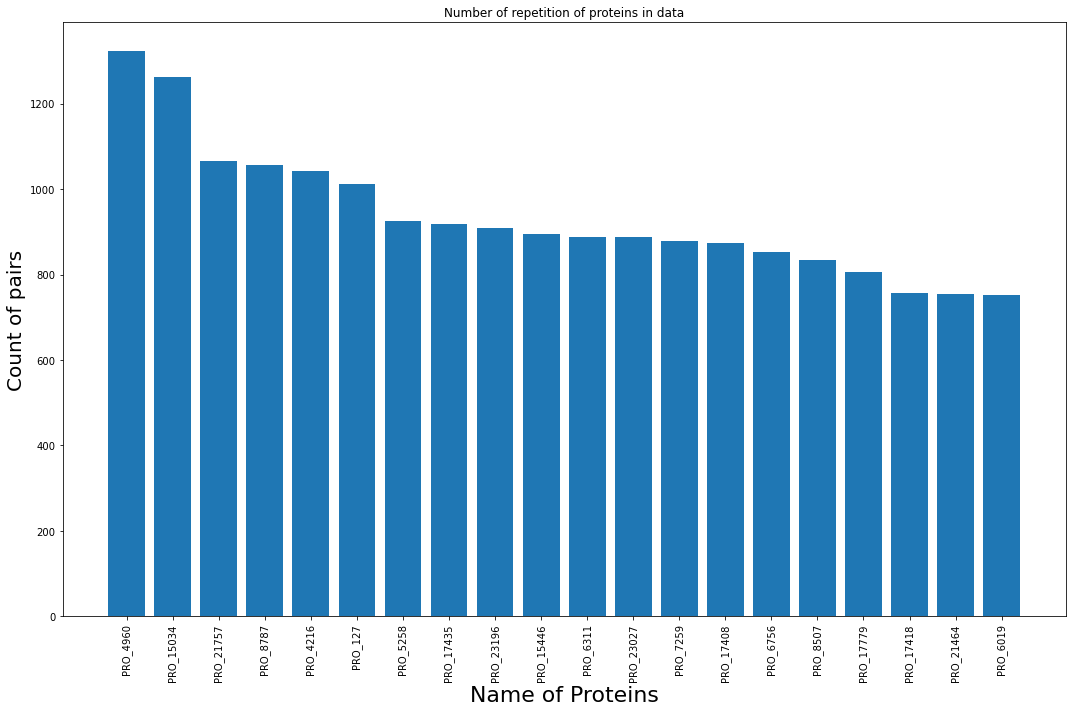

In [235]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()

### Summary of EDA
1. Published in multi papers  
2. Number of unique pairs: 396154
3. Number of proteins: 23439 
4. Max length of sequences: 1024
5. Min lenght of sequences: 13
5. Top 5 redundant proteins: 


     'PRO_4960': 1324,
     'PRO_15034': 1263,
     'PRO_21757': 1065,
     'PRO_15446': 895,
     'PRO_7259': 878,

# 3. Creating pickle file of sequences

In [240]:

with open('../pickle/prot_to_seq_pickle/all_prot_seq.pickle', 'wb') as handle:
    pickle.dump(dict_of_unique_prot_seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../pickle/prot_to_seq_pickle/all_prot_seq.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(dict_of_unique_prot_seq == b)

True


In [249]:
" ".join(dict_of_unique_prot_seq['PRO_1'])

'M E P L N R T E V S E F F L K G F S G Y P A L E H L L F P L C S A M Y L V T L L G N T A I M A V S V L D I H L H T P V Y F F L G N L S T L D I C Y T P T F V P L M L V H L L S S R K T I S F A V C A I Q M C L S L S T G S T E C L L L A I T A Y D R Y L A I C Q P L R Y H V L M S H R L C V L L M G A A W V L C L L K S V T E M V I S M R L P F C G H H V V S H F T C K I L A V L K L A C G N T S V S E D F L L A G S I L L L P V P L A F I C L S Y L L I L A T I L R V P S A A R C C K A F S T C L A H L A V V L L F Y G T I I F M Y L K P K S K E A H I S D E V F T V L Y A M V T T M L N P T I Y S L R N K E V K E A A R K V W G R S R A S R'

In [253]:
dict_of_unique_prot_seq_for_embed_vec = {}
for k,v in dict_of_unique_prot_seq_to_prot.items():
    dict_of_unique_prot_seq_for_embed_vec[v] = " ".join(k)
   

In [255]:
 dict_of_unique_prot_seq_for_embed_vec
    
with open('../pickle/prot_to_seq_pickle/all_prot_seq_for_bert.pickle', 'wb') as handle:
    pickle.dump( dict_of_unique_prot_seq_for_embed_vec, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../pickle/prot_to_seq_pickle/all_prot_seq_for_bert.pickle', 'rb') as handle:
    b = pickle.load(handle)

print( dict_of_unique_prot_seq_for_embed_vec == b)

True


<function dict.values>